In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import pairwise_distances
# from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans

In [2]:
def vis(ts, ls):
    for label in set(ls):
        plt.scatter(ts[:, 0][ls==label], ts[:, 1][ls==label], label=label)
    plt.legend()
    plt.show()
    
def cluster_sort(data, labels, rows, is_every=False):
    df = pd.DataFrame(data)
    df['cluster'] = labels
    df.sort_values('cluster', inplace=True)
    df.index = list(map(lambda x: rows[x], df.index))
    first_last = {}
    for i in set(labels):
        if is_every:
            first_last[i] = list(df[df['cluster']==i].index)
        else:
            first_last[i] = (df[df['cluster']==i].index[0], df[df['cluster']==i].index[-1])
    cl = df.pop('cluster')
    df.reindex(list(df.index), axis=1)
    return df, first_last

def get_pair_distance(d, w1, w2):
    return d[rows_ind[w1]][rows_ind[w2]]

class TSNE2(TSNE):
    def transform(*args, **kwargs):
        return TSNE.fit_transform(*args, **kwargs)
    
class DBSCAN2(DBSCAN):
    def predict(*args, **kwargs):
        return DBSCAN.fit(*args, **kwargs).labels_
    

In [95]:
data = pd.read_csv('/content/train_emb.csv')
res = pd.read_csv('/content/locs_emb.csv')
# rows =  pd.read_excel(pd.ExcelFile('Contextualized Occasions.xlsx'), sheet_name='occasions')['Occasion'].values
# rows_ind = {i: ix for ix, i in enumerate(rows)}
# d = pairwise_distances(X_train, metric='cosine')

In [101]:
train

,parking,waste_disposal,pharmacy,bench,cafe,fast_food,kindergarten,atm,school,parking_space,...,visa,research,forestry,translator,psychologist,accountant,geodesist,financial,railway,coworking
0,2,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2202,3,0,1,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2204,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
train = data.iloc [: , 1:]

In [97]:
pipe = Pipeline([
#     ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2, svd_solver='full')),
    # or 
    # ('tsne', TSNE2(n_components=2)), # , learning_rate='auto', init='random', perplexity=3) 
    ('kmeans', KMeans(n_clusters=2)),#, precompute_distances=True)), # TODO swap transform and clusterization
    # or
    # ('dbscan', DBSCAN2(eps=0.175, min_samples=2)), 
])

In [102]:
# data = X_train.iloc [: , 1:]
# data = d
pipe.fit(train)

transf, labels = pipe.transform(train), pipe.predict(train)
# labels =  pipe.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [23]:
df = X_train.iloc [: , 1:]

In [84]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 3).fit(train)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(train)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

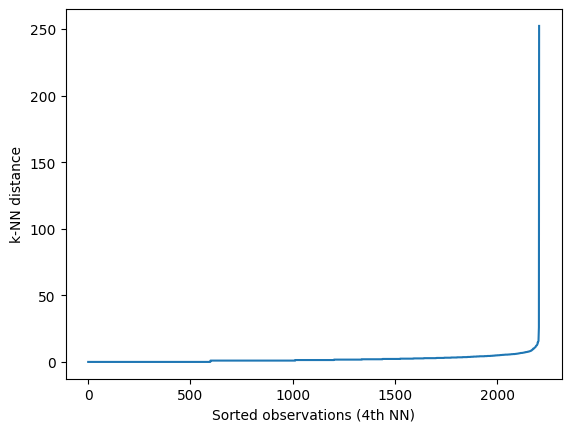

In [86]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 2]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [33]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

14.696938456699069


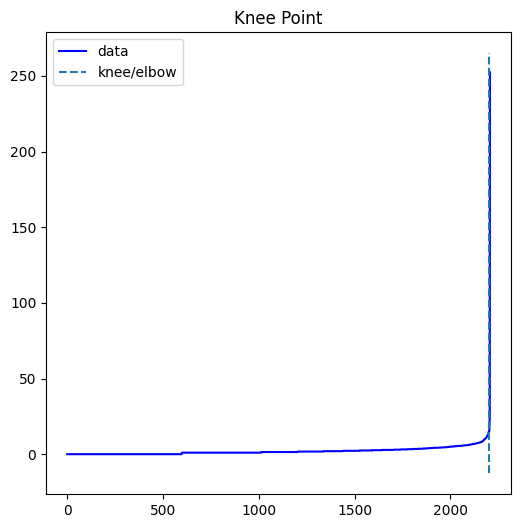

In [88]:
kneedle.plot_knee()
plt.show()

In [91]:
pipe = Pipeline([
#     ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2, svd_solver='full')),
    # or 
    ('tsne', TSNE2(n_components=2)), # , learning_rate='auto', init='random', perplexity=3) 
    # ('kmeans', KMeans(n_clusters=2)),#, precompute_distances=True)), # TODO swap transform and clusterization
    # or
    # ('dbscan', DBSCAN2(eps=14.45, min_samples=2)), 
])

In [89]:
clusters = clusters = DBSCAN(eps = 14.45, min_samples = 2).fit(df)

In [79]:
clusters.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [92]:
tsne_results = pipe.fit_transform(res.iloc [: , 1:])

ValueError: ignored

In [74]:
df["x_component"]=tsne_results[:,0]
df["y_component"]=tsne_results[:,1]
df["claster"] = clusters.labels_

In [77]:
import plotly.express as px
    
fig = px.scatter(df, x="x_component", y="y_component", hover_name="claster", color = "claster", size_max=60)
fig.update_layout(
     height=800)
fig.show()

ValueError: ignored

In [59]:
# df['tsne-2d-one'] = tsne_results[:,0]
# df['tsne-2d-two'] = tsne_results[:,1]

# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     hue="y",
#     palette=sns.color_palette("hls", 10),
#     data=df,
#     legend="full",
#     alpha=0.3
# )

ValueError: ignored

<Figure size 1600x1000 with 0 Axes>

In [65]:
clusters = pipe.fit(df)
# transf, labels = pipe.transform(data), pipe.predict(data)
labels =  pipe.predict(data)

AttributeError: ignored

In [67]:
vis(clusters, labels)

TypeError: ignored